In [1]:
import torch 
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

In [2]:
rng=np.random.default_rng(seed=42)

In [3]:
import scipy as sci

In [4]:
from pathlib import Path

In [16]:
Path.cwd().parent.parent

PosixPath('/home/ozkanib20/Linux_app01')

In [61]:
data=pd.read_csv(Path.cwd().parent.parent/'PYTHON_FOR_END'/"weight-height.csv")

In [62]:
data=data[data["Gender"]==1]

In [63]:
data=np.array(data.drop("Gender",axis=1))[:100]

In [65]:
data

array([[ 73.84701702, 241.8935632 ],
       [ 68.78190405, 162.3104725 ],
       [ 74.11010539, 212.7408556 ],
       [ 71.7309784 , 220.0424703 ],
       [ 69.88179586, 206.3498006 ],
       [ 67.25301569, 152.2121558 ],
       [ 68.78508125, 183.9278886 ],
       [ 68.34851551, 167.9711105 ],
       [ 67.01894966, 175.9294404 ],
       [ 63.45649398, 156.3996764 ],
       [ 71.19538228, 186.6049256 ],
       [ 71.64080512, 213.7411695 ],
       [ 64.76632913, 167.1274611 ],
       [ 69.2830701 , 189.4461814 ],
       [ 69.24373223, 186.434168  ],
       [ 67.6456197 , 172.1869301 ],
       [ 72.41831663, 196.0285063 ],
       [ 63.97432572, 172.8834702 ],
       [ 69.6400599 , 185.9839576 ],
       [ 67.93600485, 182.426648  ],
       [ 67.91505019, 174.1159291 ],
       [ 69.43943987, 197.7314216 ],
       [ 66.14913196, 149.173566  ],
       [ 75.20597361, 228.7617806 ],
       [ 67.89319634, 162.0066518 ],
       [ 68.1440328 , 192.3439766 ],
       [ 69.08963143, 184.4351744 ],
 

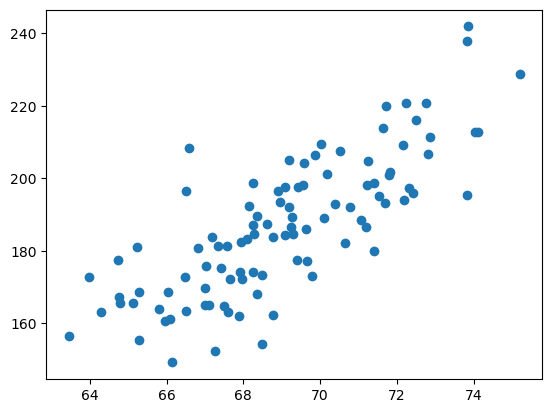

In [67]:
plt.scatter(data[:,0],data[:,1])



In [132]:
x0=np.ones((data.shape[0],1))
x1=data[:,0:1]
x2=x1**2
y=data[:,1:2]


In [133]:
A=np.concatenate((x0,x1,x2),axis=1)

In [134]:
A

array([[1.00000000e+00, 7.38470170e+01, 5.45338192e+03],
       [1.00000000e+00, 6.87819040e+01, 4.73095032e+03],
       [1.00000000e+00, 7.41101054e+01, 5.49230772e+03],
       [1.00000000e+00, 7.17309784e+01, 5.14533326e+03],
       [1.00000000e+00, 6.98817959e+01, 4.88346539e+03],
       [1.00000000e+00, 6.72530157e+01, 4.52296812e+03],
       [1.00000000e+00, 6.87850813e+01, 4.73138740e+03],
       [1.00000000e+00, 6.83485155e+01, 4.67151957e+03],
       [1.00000000e+00, 6.70189497e+01, 4.49153961e+03],
       [1.00000000e+00, 6.34564940e+01, 4.02672663e+03],
       [1.00000000e+00, 7.11953823e+01, 5.06878246e+03],
       [1.00000000e+00, 7.16408051e+01, 5.13240496e+03],
       [1.00000000e+00, 6.47663291e+01, 4.19467739e+03],
       [1.00000000e+00, 6.92830701e+01, 4.80014380e+03],
       [1.00000000e+00, 6.92437322e+01, 4.79469445e+03],
       [1.00000000e+00, 6.76456197e+01, 4.57592986e+03],
       [1.00000000e+00, 7.24183166e+01, 5.24441258e+03],
       [1.00000000e+00, 6.39743

In [135]:
A_inv=np.linalg.pinv(A)

In [136]:
pred=A_inv@y

In [137]:
pred

array([[ 1.10467178e+03],
       [-3.24020259e+01],
       [ 2.76364893e-01]])

In [12]:
def plot_line(inf,p1,p2):
    b0=inf[0]
    b1=inf[1]
    b2=inf[2]
    x=np.arange(p1,p2)
    y=b2*x**2+b1*x+b0
    return (x,y)
        

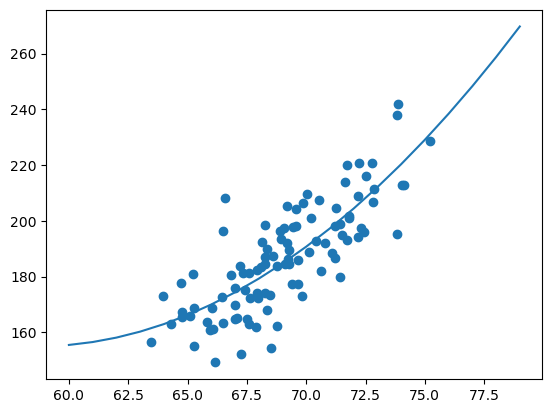

In [143]:
plt.scatter(data[:,0],data[:,1])
plt.plot(plot_line(pred)[0],plot_line(pred)[1])

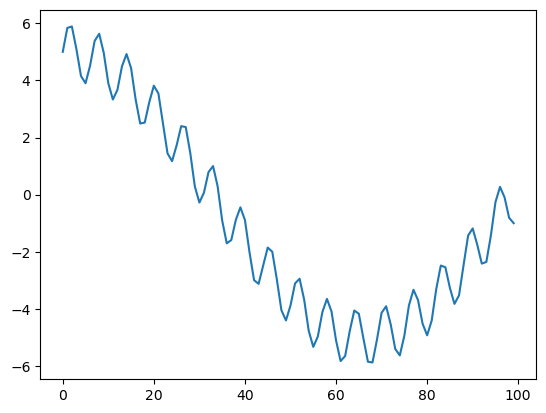

In [5]:
data=np.sin(np.arange(100))+np.cos(np.linspace(0,3*np.pi/2,100))*5
plt.plot(data)

In [8]:
def gaus_disp(mean,p2,sigma=1,p1=0):
    s=np.arange(p1,p2)
    part1=1/(sigma*np.sqrt(2*np.pi))
    func=part1*np.exp(-(s-mean)**2/(2*sigma**2))
    return func/np.linalg.norm(func)
    

In [61]:
def llg(data,estpoint):
    data=np.concatenate((np.atleast_2d(np.arange(len(data))),np.atleast_2d(data)),axis=0).T
    weight=np.diag(gaus_disp(estpoint,p2=data.shape[0],sigma=50))
    x0=np.ones((data.shape[0],1))
    x1=data[:,0:1]
    x2=x1**2
    y=weight@data[:,1:2]
    A=np.concatenate((x0,x1,x2),axis=1)
    A_inv=np.linalg.pinv(weight@A)
    est=A_inv@y
    return est


([<matplotlib.lines.Line2D at 0x7f32277609d0>],
 [<matplotlib.lines.Line2D at 0x7f3227760ca0>])

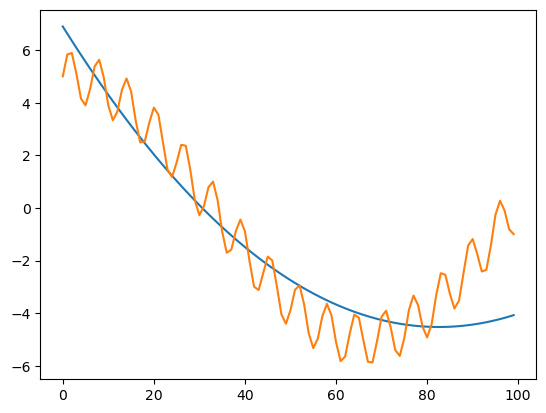

In [62]:
x=plot_line(llg(data,10),0,100)
plt.plot(x[0],x[1]),plt.plot(data)